In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

train_df = pd.read_csv("/kaggle/input/birdclef-2025/train.csv").drop(columns = ['url', 'license'])
taxonomy_df = pd.read_csv("/kaggle/input/birdclef-2025/taxonomy.csv")

train_df = pd.merge(
                train_df,
                taxonomy_df[['primary_label', 'class_name']],
                how = 'left',
                on = ['primary_label']
            )

In [8]:
len(train_df[train_df["secondary_labels"]!="['']"])/ len(train_df)

0.09378938524016245

Insecta
primary_label
52884      33
50186      30
48124      20
715170     17
1462737     7
1564122     6
714022      5
548639      5
963335      5
1346504     5
523060      4
1192948     4
868458      4
1462711     3
1194042     3
528041      2
1139490     2
Name: count, dtype: int64


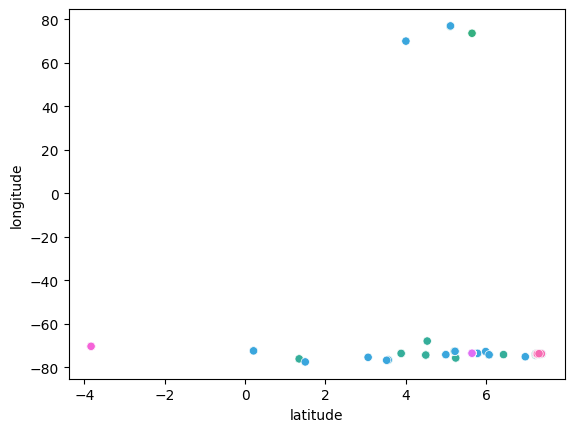

Amphibia
primary_label
65448     82
21211     76
517119    58
22973     53
22333     47
22976     44
65373     32
555086    25
65962     21
65349     16
65344     16
67252     14
24322     13
135045    10
65547      7
787625     7
24272      6
555142     6
65336      6
126247     6
476538     5
66893      5
134933     4
65419      3
24292      3
66578      2
67082      2
64862      2
66531      2
66016      2
476537     2
21116      2
21038      2
81930      2
Name: count, dtype: int64


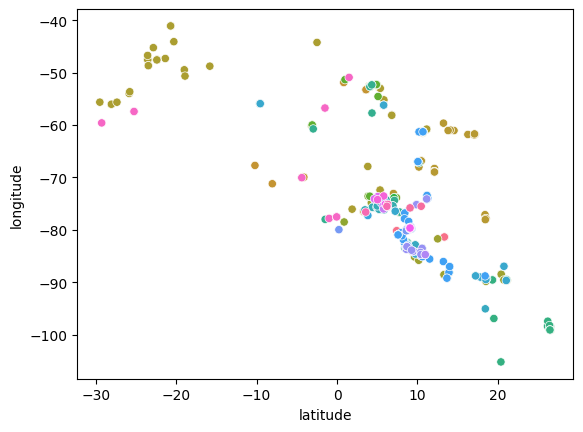

Mammalia
primary_label
41663     108
566513     23
42007      19
41970      15
46010       5
41778       2
42087       2
42113       2
47067       2
Name: count, dtype: int64


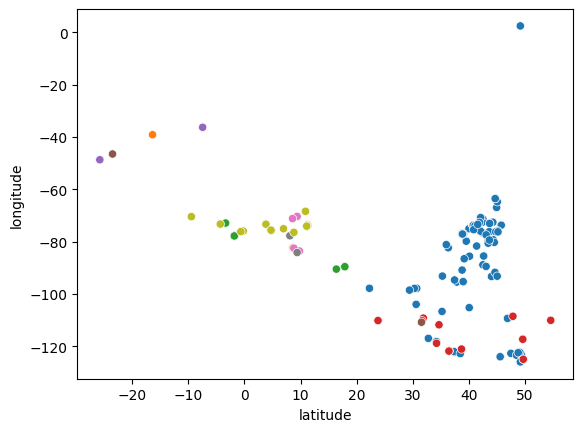

Aves
primary_label
grekis     990
compau     808
trokin     787
roahaw     709
banana     610
          ... 
shghum1     15
sahpar1     14
norscr1     14
turvul      11
plctan1      6
Name: count, Length: 146, dtype: int64


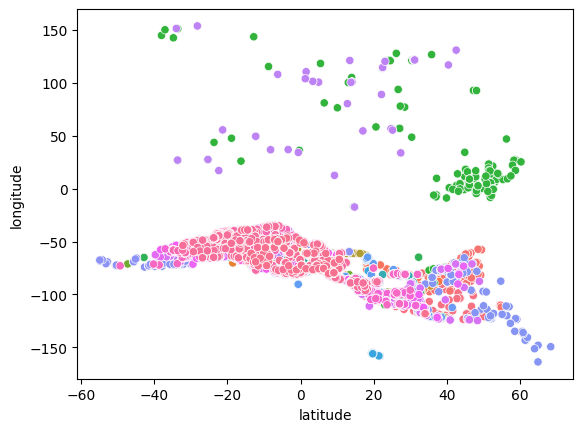

In [10]:
unique_animal_classses = taxonomy_df.class_name.unique()
for animal in unique_animal_classses:
    print(animal)
    data = train_df[train_df['class_name'] == animal]
    print(data.primary_label.value_counts())
    sns.scatterplot(data = data, x = 'latitude', y = 'longitude', hue = 'primary_label', legend=False)
    plt.show()

count    206.000000
mean     138.660194
std      169.177583
min        2.000000
25%       19.000000
50%       80.500000
75%      182.750000
max      990.000000
Name: count, dtype: float64
classic


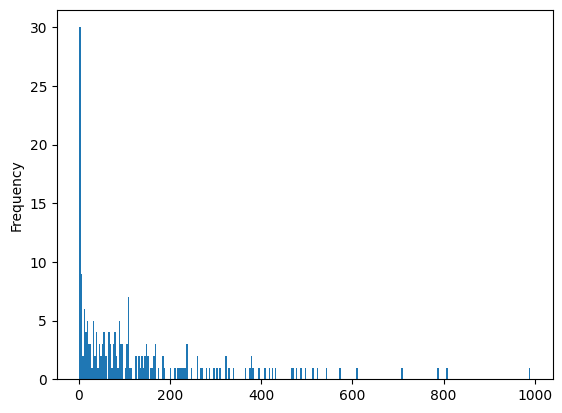

In [11]:
train_df.primary_label.value_counts().plot.hist(bins = 300)
print(train_df.primary_label.value_counts().describe())
print('classic')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder().fit(train_df.primary_label)
train_idx, small_test_idx = train_test_split(
    np.arange(len(train_df)),
    train_size = 0.8,
    test_size = 0.2*0.2, 
    random_state = 32, 
    stratify = train_df['primary_label']
)

In [13]:
train_df['primary_label'] = le.transform(train_df['primary_label'])

<Axes: ylabel='Frequency'>

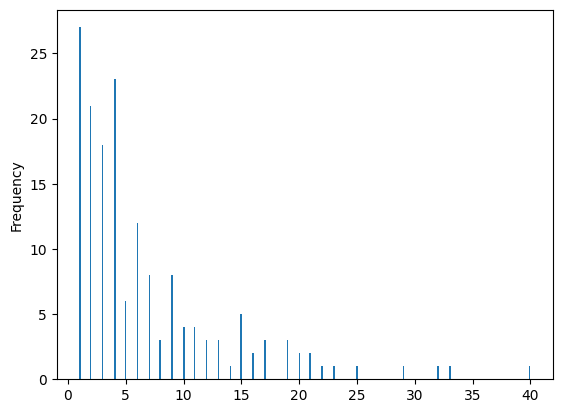

In [15]:
train_df.iloc[small_test_idx].primary_label.value_counts().plot.hist(bins = 300)

<Axes: ylabel='Frequency'>

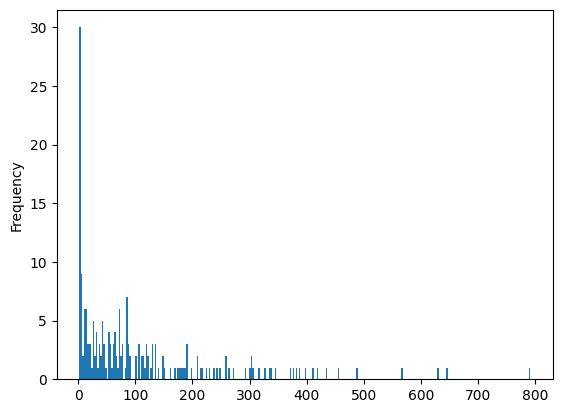

In [16]:
train_df.iloc[train_idx].primary_label.value_counts().plot.hist(bins = 300)

In [2]:
train_df.groupby('class_name')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
class_name,,,,,,,,
Amphibia,583.0,0.952830,1.682716,0.0,0.0,0.0,2.0,5.0
Aves,27648.0,2.992025,1.934836,0.0,0.0,4.0,4.5,5.0
Insecta,155.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Mammalia,178.0,0.247191,0.880176,0.0,0.0,0.0,0.0,5.0


In [3]:
train_df[train_df['rating'] != 0].groupby('class_name')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
class_name,,,,,,,,
Amphibia,147.0,3.778912,0.731224,2.0,3.0,4.0,4.0,5.0
Aves,20452.0,4.044763,0.895847,0.5,3.5,4.0,5.0,5.0
Mammalia,17.0,2.588235,1.460258,1.0,2.0,2.0,4.0,5.0


In [17]:
taxonomy_2 = pd.read_excel('/kaggle/input/birdfams/AviList-v2025-11Jun-extended.xlsx', index_col = 'Sequence')


In [16]:
#families by audios
pd.merge(
    left = taxonomy_2, 
    right = train_df, 
    left_on = 'Scientific_name', 
    right_on = 'scientific_name').drop_duplicates(subset = ['filename'])['Family'].value_counts()

Family
Tyrannidae           6150
Thraupidae           2678
Psittacidae          1136
Troglodytidae        1081
Falconidae           1045
Columbidae            966
Accipitridae          962
Furnariidae           859
Cuculidae             845
Strigidae             835
Icteridae             819
Caprimulgidae         808
Ardeidae              776
Picidae               650
Thamnophilidae        605
Parulidae             564
Rallidae              512
Charadriidae          487
Alcedinidae           471
Nyctibiidae           450
Anatidae              424
Tinamidae             406
Pipridae              380
Ramphastidae          368
Hirundinidae          326
Tityridae             305
Galbulidae            261
Cracidae              242
Scolopacidae          237
Donacobiidae          176
Threskiornithidae     170
Trochilidae           163
Fringillidae          153
Momotidae             144
Jacanidae             133
Corvidae              108
Podicipedidae         108
Anhingidae             91
Phala

In [15]:
#families by species
pd.merge(
    left = taxonomy_2, 
    right = train_df, 
    left_on = 'Scientific_name', 
    right_on = 'scientific_name').drop_duplicates(subset = ['scientific_name'])['Family'].value_counts()

Family
Tyrannidae           20
Thraupidae           13
Psittacidae           9
Ardeidae              6
Icteridae             6
Accipitridae          5
Picidae               5
Furnariidae           5
Columbidae            4
Thamnophilidae        4
Tityridae             4
Alcedinidae           4
Troglodytidae         4
Cuculidae             3
Cracidae              3
Strigidae             3
Threskiornithidae     3
Hirundinidae          3
Falconidae            3
Nyctibiidae           2
Trochilidae           2
Parulidae             2
Pipridae              2
Momotidae             2
Cathartidae           2
Tinamidae             2
Rallidae              2
Bucconidae            2
Ramphastidae          2
Anhimidae             1
Anatidae              1
Anhingidae            1
Ciconiidae            1
Laridae               1
Scolopacidae          1
Jacanidae             1
Charadriidae          1
Odontophoridae        1
Podicipedidae         1
Galbulidae            1
Trogonidae            1
Caprimulg